# Analyse des données : pollution / années
## Projet DALAS
### SOYKOK Aylin - CELIK Simay

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/data_annees.csv')
for column in df.columns:
    if column != 'Country':
        df[column] = pd.to_numeric(df[column], errors='coerce')


In [3]:
df

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year,Generated
0,Switzerland,206.2,138.1,68.2,68.0,143.9,7.1,24.6,26.8,NaN,2014,0
1,United States,195.5,132.9,49.9,68.6,77.4,2.4,37.1,35.1,NaN,2014,0
2,Germany,192.7,112.3,72.9,75.3,87.1,5.6,36.1,30.2,NaN,2014,0
3,Sweden,180.9,106.1,61.7,75.2,103.7,9.4,34.1,17.5,NaN,2014,0
4,Finland,178.9,97.9,70.8,68.7,103.3,7.8,37.0,16.7,NaN,2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...
822,Iran,77.7,21.2,50.5,53.0,26.9,22.4,46.8,74.8,63.4,2024,0
823,Venezuela,77.3,12.6,18.8,38.7,39.4,15.2,32.8,75.6,99.9,2024,0
824,Sri Lanka,76.9,14.4,57.9,71.1,33.2,36.0,54.8,58.8,59.1,2024,0
825,Bangladesh,69.1,25.8,38.5,42.3,24.9,12.7,57.7,85.6,71.3,2024,0


In [4]:
df['Year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype=int64)

Year
2014    52.979412
2015    56.426744
2016    51.112500
2017    52.268657
2018    49.881667
2019    51.036620
2020    53.228750
2021    52.912048
2022    53.127586
2023    52.830952
2024    53.032941
Name: Pollution Index, dtype: float64

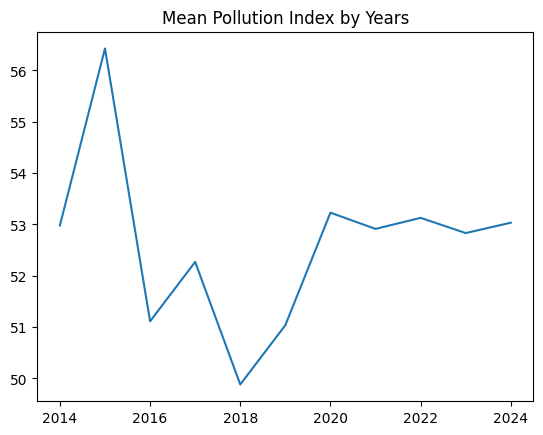

In [5]:
mean_pollution_index = df.groupby('Year')['Pollution Index'].mean()
plt.plot(mean_pollution_index)
plt.title('Mean Pollution Index by Years')
mean_pollution_index

Year
2014    64.785294
2015    61.981395
2016    92.650000
2017    72.091045
2018    79.716667
2019    71.278873
2020    59.753750
2021    53.243373
2022    55.883908
2023    61.971429
2024    61.582353
Name: Purchasing Power Index, dtype: float64

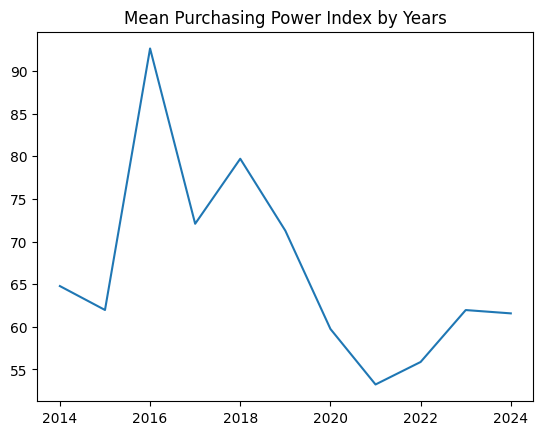

In [6]:
mean_power_index = df.groupby('Year')['Purchasing Power Index'].mean()
plt.plot(mean_power_index)
plt.title('Mean Purchasing Power Index by Years')
mean_power_index

Year
2014          NaN
2015          NaN
2016    56.594643
2017    51.708955
2018    77.721667
2019    77.130986
2020    77.350000
2021    77.600000
2022    78.322989
2023    77.789286
2024    78.172941
Name: Climate Index, dtype: float64

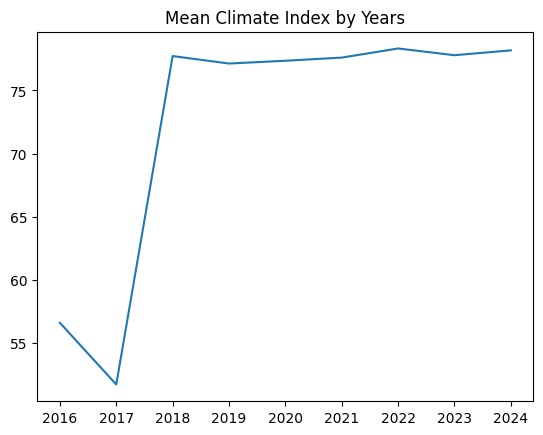

In [7]:
mean_climate_index = df.groupby('Year')['Climate Index'].mean()
plt.plot(mean_climate_index)
plt.title('Mean Climate Index by Years')
mean_climate_index